In [4]:
setwd('data')
list.files()

ERROR: Error in setwd("data"): cannot change working directory


In [5]:
# Read data
loans <- read.csv('prosperLoanData.csv')

In [6]:
# Load Libraries
library(plyr)
library(ggplot2)
library(dplyr)
library(stringr)

## Univariate Exploration

In [4]:
dim(loans)
str(loans)

[1] 113937     81

'data.frame':	113937 obs. of  81 variables:
 $ ListingKey                         : Factor w/ 113066 levels "00003546482094282EF90E5",..: 7180 7193 6647 6669 6686 6689 6699 6706 6687 6687 ...
 $ ListingNumber                      : int  193129 1209647 81716 658116 909464 1074836 750899 768193 1023355 1023355 ...
 $ ListingCreationDate                : Factor w/ 113064 levels "2005-11-09 20:44:28.847000000",..: 14184 111894 6429 64760 85967 100310 72556 74019 97834 97834 ...
 $ CreditGrade                        : Factor w/ 9 levels "","A","AA","B",..: 5 1 8 1 1 1 1 1 1 1 ...
 $ Term                               : int  36 36 36 36 36 60 36 36 36 36 ...
 $ LoanStatus                         : Factor w/ 12 levels "Cancelled","Chargedoff",..: 3 4 3 4 4 4 4 4 4 4 ...
 $ ClosedDate                         : Factor w/ 2803 levels "","2005-11-25 00:00:00",..: 1138 1 1263 1 1 1 1 1 1 1 ...
 $ BorrowerAPR                        : num  0.165 0.12 0.283 0.125 0.246 ...
 $ BorrowerRate            

Taking a peak at the data it's easy to see that this dataset has many (81) variables. I used this list to create a shorter set of variables of interest to explore. There are 113,937 observations (which makes it worrisome that the variable loan key is a factor with only 113066 levels). Let's explore that first after seeing a summary of the dataset.

In [23]:
summary(loans)

                   ListingKey     ListingNumber    
 17A93590655669644DB4C06:     6   Min.   :      4  
 349D3587495831350F0F648:     4   1st Qu.: 400919  
 47C1359638497431975670B:     4   Median : 600554  
 8474358854651984137201C:     4   Mean   : 627886  
 DE8535960513435199406CE:     4   3rd Qu.: 892634  
 04C13599434217079754AEE:     3   Max.   :1255725  
 (Other)                :113912                    
                    ListingCreationDate  CreditGrade         Term      
 2013-10-02 17:20:16.550000000:     6          :84984   Min.   :12.00  
 2013-08-28 20:31:41.107000000:     4   C      : 5649   1st Qu.:36.00  
 2013-09-08 09:27:44.853000000:     4   D      : 5153   Median :36.00  
 2013-12-06 05:43:13.830000000:     4   B      : 4389   Mean   :40.83  
 2013-12-06 11:44:58.283000000:     4   AA     : 3509   3rd Qu.:36.00  
 2013-08-21 07:25:22.360000000:     3   HR     : 3508   Max.   :60.00  
 (Other)                      :113912   (Other): 6745                  
        

All sorts of information there at a glance. Get to see ranges, maximums and counts. But it is a lot to take in at once, so let's dive into the individual variables I singled out interesting.

## Listing Key

In [4]:
length(loans$ListingKey)
length(unique(loans$ListingKey))

[1] 113937

[1] 113066

Here I wanted to see if the listing keys, which are supposed to be unique identifiers really were unique. It seems like a lot of them arnt'.

In [5]:
loans %>%
select(ListingKey) %>%
group_by(ListingKey) %>%
summarise(listing_key_appears = n()) %>%
group_by(listing_key_appears) %>%
summarise(count = n())

listing_key_appears,count
1,112239
2,790
3,32
4,4
6,1


So we can see that many of the keys appear multiple times, with one loan appearing a whopping six times. Let's see that loan.

In [9]:
loans %>%
filter(ListingKey == '17A93590655669644DB4C06')

ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,,60,Current,,0.16662,0.1435,0.1335,...,-8.49,0,0,0,0,1,0,0,0,96
17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,,60,Current,,0.16662,0.1435,0.1335,...,-8.49,0,0,0,0,1,0,0,0,96
17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,,60,Current,,0.16662,0.1435,0.1335,...,-8.49,0,0,0,0,1,0,0,0,96
17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,,60,Current,,0.16662,0.1435,0.1335,...,-8.49,0,0,0,0,1,0,0,0,96
17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,,60,Current,,0.16662,0.1435,0.1335,...,-8.49,0,0,0,0,1,0,0,0,96
17A93590655669644DB4C06,951186,2013-10-02 17:20:16.550000000,,60,Current,,0.16662,0.1435,0.1335,...,-8.49,0,0,0,0,1,0,0,0,96


It seems this loan is just repeated in the dataset 6 times. Let's make sure I'm not missing anything that's even slightly different.

In [6]:
multiple_values <- loans %>%
filter(ListingKey == '17A93590655669644DB4C06') %>%
apply(2, unique) %>%
lengths

#This gets the column name where there are multiple values in a grouped column.
names(multiple_values[multiple_values > 1])

[1] "ProsperScore"

There it is, this loan somehow as 6 different ProsperScores. Let's see if this holds true for the other duplicate loans.

In [4]:
#Create vector of the duplicate keys.
duplicate_keys <- loans %>% 
group_by(ListingKey) %>%
summarise(count = n()) %>%
filter(count > 1) %>%
select(ListingKey)

In [5]:
duplicate_loans <- loans %>% filter(ListingKey %in% duplicate_keys[[1]])
#Count distinct values in each column by key. 
value_count <- aggregate(duplicate_loans, list(duplicate_loans$ListingKey), n_distinct)
#Note: loans could repeat same value, but that is fine to me.

In [6]:
value_count_long <- stack(value_count, select=names(value_count[-1]))
value_count_long %>% filter(values > 2) %>% select(ind) %>% unique

ind
ProsperScore


Selecting by Investors


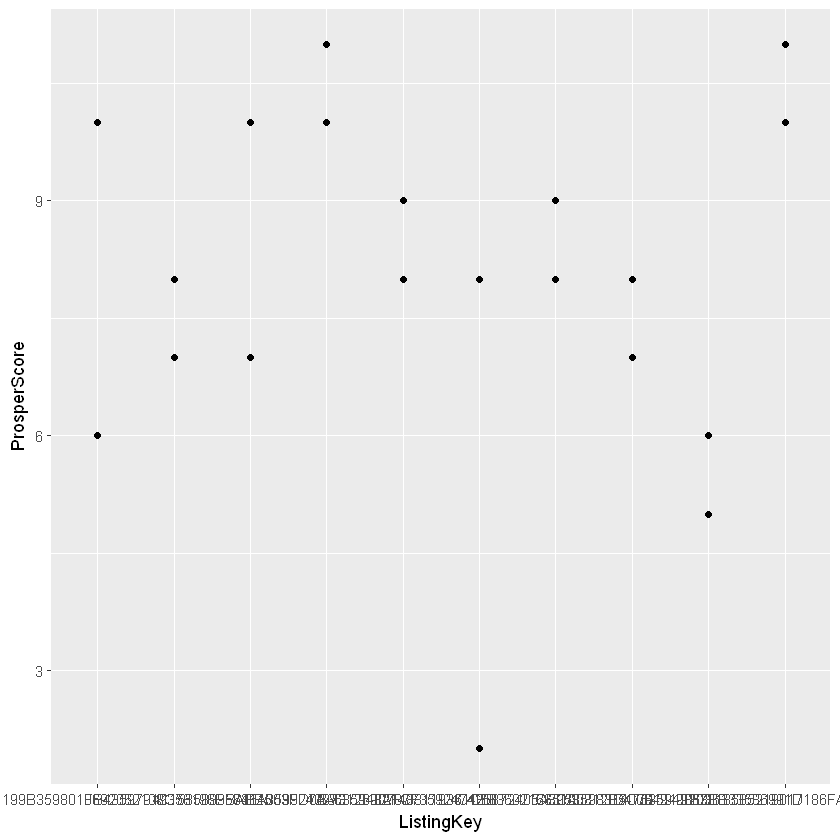

In [10]:
duplicate_loans %>%
arrange(ListingKey) %>% top_n(20) %>%
ggplot(aes(ListingKey, ProsperScore, group=ListingKey)) + geom_point()

Taking a look at just a few loans we can see that the spread isn't always the same between ProsperScores with the same listing ID. Because there doesn't seem to be a pattern here I elected to eliminate all duplicate rows from my dataset 

In [7]:
#Eliminate duplicate rows.
#Necessary Clean
loans <- loans %>% filter(!ListingKey %in% duplicate_keys[[1]])

In [13]:
length(loans$ListingKey)
length(unique(loans$ListingKey))

[1] 112239

[1] 112239

Now we're cooking with gas.

## Term

In [20]:
head(loans$Term)

[1] 36 36 36 36 36 60

In [21]:
summary(loans$Term)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12.00   36.00   36.00   40.77   36.00   60.00 

Seems like the minimum loan term is a year, but the mean is 40.83 months, a little over 3 years.

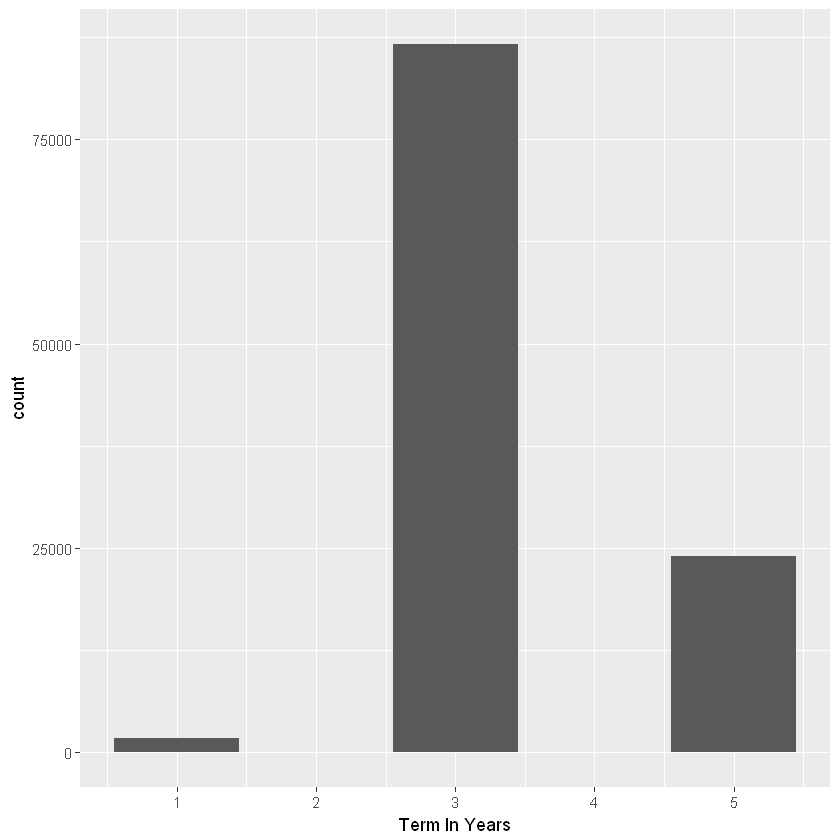

In [23]:
# Plot Term frequency in years.
ggplot(loans, aes(Term/12)) + geom_bar() + xlab("Term In Years")

Here we can see that term is discrete, and that 3 year loans far outpace 5 year loans, with 1 year loans coming in a distant third.

In [24]:
loans %>%
    group_by(Term) %>%
    summarise(count_per_term = n()) %>%
    mutate(percentage = count_per_term / sum(count_per_term) * 100)

Term,count_per_term,percentage
12,1614,1.438003
36,86694,77.240531
60,23931,21.321466


Here is the same information in a table with percentages.

## Loan Status 

In [28]:
summary(loans$LoanStatus)

Cancelled             Chargedoff              Completed 
                     5                  11992                  38048 
               Current              Defaulted FinalPaymentInProgress 
                 54928                   5018                    201 
  Past Due (>120 days)   Past Due (1-15 days)  Past Due (16-30 days) 
                    16                    794                    265 
 Past Due (31-60 days)  Past Due (61-90 days) Past Due (91-120 days) 
                   359                    309                    304

In [29]:
#clean
loans$LoanStatus <- factor(loans$LoanStatus, levels = c('Cancelled',
                                                          'Defaulted',
                                                          'Chargedoff',
                                                          'Completed',
                                                          'Current',
                                                          'FinalPaymentInProgress',
                                                          'Past Due (1-15 days)',
                                                          'Past Due (16-30 days)',
                                                          'Past Due (31-60 days)',
                                                          'Past Due (61-90 days)',
                                                          'Past Due (91-120 days)',
                                                          'Past Due (>120 days)'
                                                         ))

Don't like that Past Due > 120 is out of order with the other past dues, so I changed the order of the levels. 

A quick note on definitions:  
Chargedoff - 
Via Investopedia.com "A charge-off or chargeoff is the declaration by a creditor (usually a credit card account) that an amount of debt is unlikely to be collected. This occurs when a consumer becomes severely delinquent on a debt. Traditionally, creditors will make this declaration at the point of six months without payment."  
  
Default  
"Default is the failure to pay interest or principal on a loan or security when due. Default occurs when a debtor is unable to meet the legal obligation of debt repayment ... When an individual, a business or even a nation defaults on a debt obligation, the lender or investor has some recourse to reclaim the funds, but it varies based on the type of security involved.



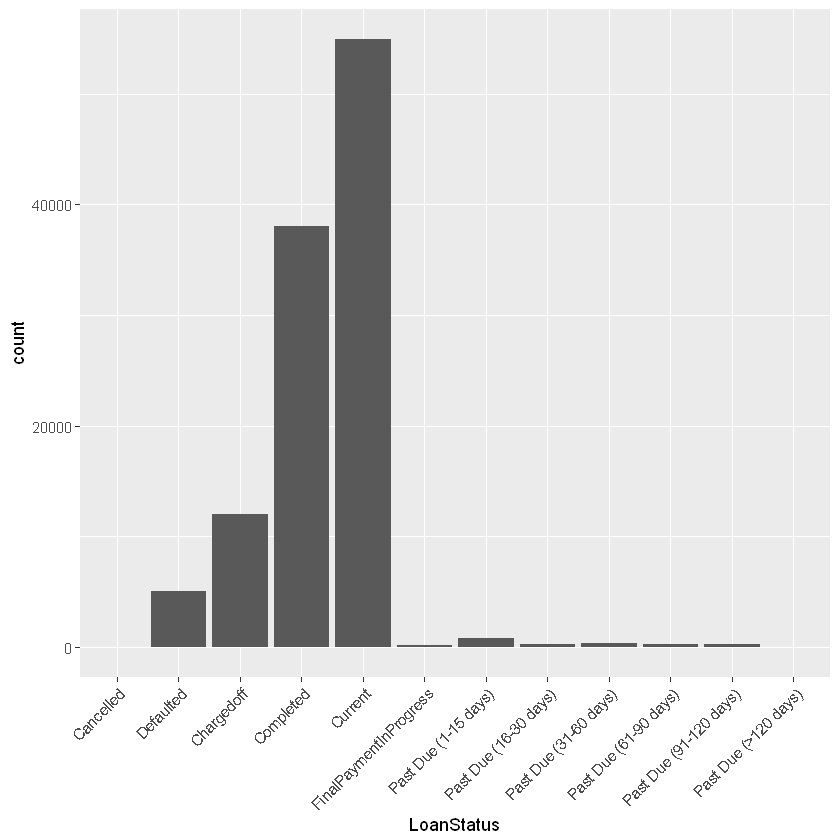

In [30]:
ggplot(loans, aes(LoanStatus)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

Happily, the majority of the loans are either current or completed. If we were creating a model for this data it would likely be to predict if a new loan was going to become charged-of, defaulted, or past due. Cancelled, as we can see from our table, has just 5 loans. At this point I also reorder the factors so that the Past Due levels are in the correct order.

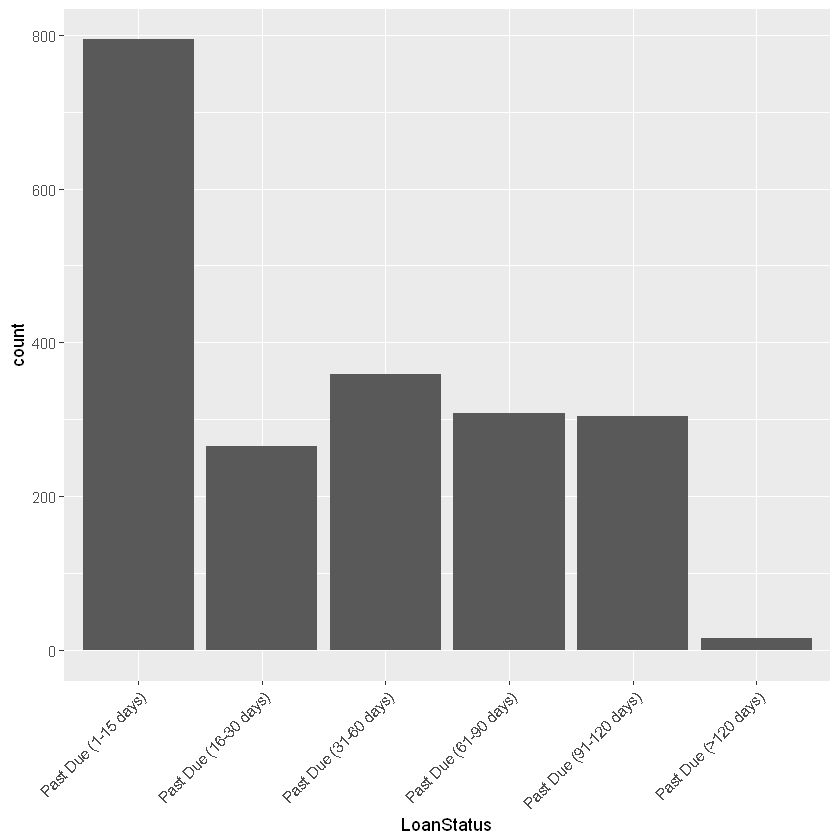

In [31]:
#Plot the distribution of Past Due Loans
on_time_loans <- c('Cancelled', 'Completed', 'Chargedoff', 'Current','Defaulted','FinalPaymentInProgress')

past_due_loans <- loans %>%
filter(!LoanStatus %in% on_time_loans)
ggplot(past_due_loans, aes(LoanStatus)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

#adjusting x label source : http://tallman-world.tumblr.com/post/89964965867/rhow-to-rotate-axis-labels-in-ggplot2

Here we look at the distribution of Past Due loans.  
It seems that most loans that are past due are only 1-15 days past Due. This suggests that many of these loans are will become current again. I'm not sure if loans default or need to go through the whole 120 days. It is also worth noting that some of the bins here are larger than others, making the graph slightly misleading. (First two are 13 days, next three are 30.) 

In [32]:
loans %>%
filter(LoanStatus == 'Cancelled') 

ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
093D3365430569291709120,8912,2006-04-26 22:23:10.147000000,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,...,0,0,0,0,0,1,0,0,0,6
F77F33664545520971829DC,7646,2006-04-25 07:59:15.203000000,C,36,Cancelled,2006-05-31 00:00:00,0.14659,0.1395,0.1345,...,0,0,0,0,0,1,0,0,0,62
09E1336627538645259AE42,908,2006-02-28 08:18:58.527000000,HR,36,Cancelled,2006-03-29 00:00:00,0.20735,0.2000,0.1950,...,0,0,0,0,0,1,0,0,0,23
29453366240667435235AEE,11364,2006-05-05 03:16:59.510000000,HR,36,Cancelled,2006-05-31 00:00:00,0.25650,0.2375,0.2325,...,0,0,0,0,0,1,0,0,0,7
E77E34330098056070F5C30,410006,2008-10-07 17:09:34.653000000,A,36,Cancelled,2008-10-16 00:00:00,0.16219,0.1075,0.0975,...,0,0,0,0,0,1,0,0,0,25


Seems that these are loans that started to be funded and then were cancelled. There are only 5 of them, and they all seem to have been closed less than a month after creation.

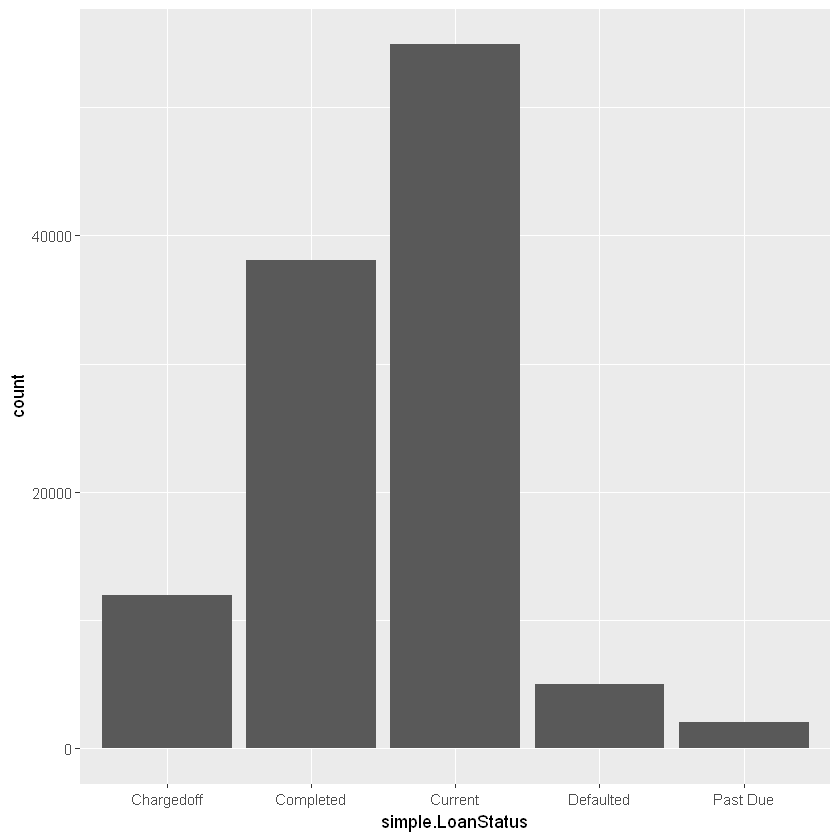

In [33]:
######Add a new, simplified LoanStatus column called simple.LoanStatus
loans %>%
mutate(simple.LoanStatus = ifelse(str_detect(LoanStatus, "Past"), 'Past Due', as.character(LoanStatus)))%>%
filter(!str_detect(simple.LoanStatus, "Final")) %>%
filter(simple.LoanStatus != "Cancelled") %>%
ggplot(aes(simple.LoanStatus)) + geom_bar()

Our original LoanStatus bar chart had a bit too much going on, so above I have simplified it. This chart gives us a better idea of how many loans are past due.  

These LoanStatus' are intersting, but a lot depends on the data. Is this a snapshot of a month, a year? If this was for all time Completed and Defaulted will eventually become a huge part of the mix as the amount of loan history outpaces loans being originated. This distribution makes me think that it is a snapshot of a certain time frame.

In [15]:
#Further Investigation
#loans %>%
#select(ListingCreationDate, ClosedDate) %>%
#top_n(30) %>%
#mutate(interval = interval(ListingCreationDate, ClosedDate)) #ListingCreationDate
#ClosedDate

## Borrower APR

In [16]:
summary(loans$BorrowerAPR)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
0.00653 0.15630 0.21020 0.21910 0.28490 0.51230      25 

The Borrower APR is interesting to me in several ways. First off, there are people with incredible deals and terrible deals. Our minimum is .6% - that's a pretty great rate. I don't know anyone getting a rate that rate cheap outside of the Fed. On the other end there is someone paying 51% APR. Yikes. In some ways that probably means that's where the line is for risk. Prosper, or their lending partners, thinks there is a positive return on someone so risky you need to charge them over half the principal per year to loan it. 

Warning message:
"Removed 25 rows containing non-finite values (stat_bin)."

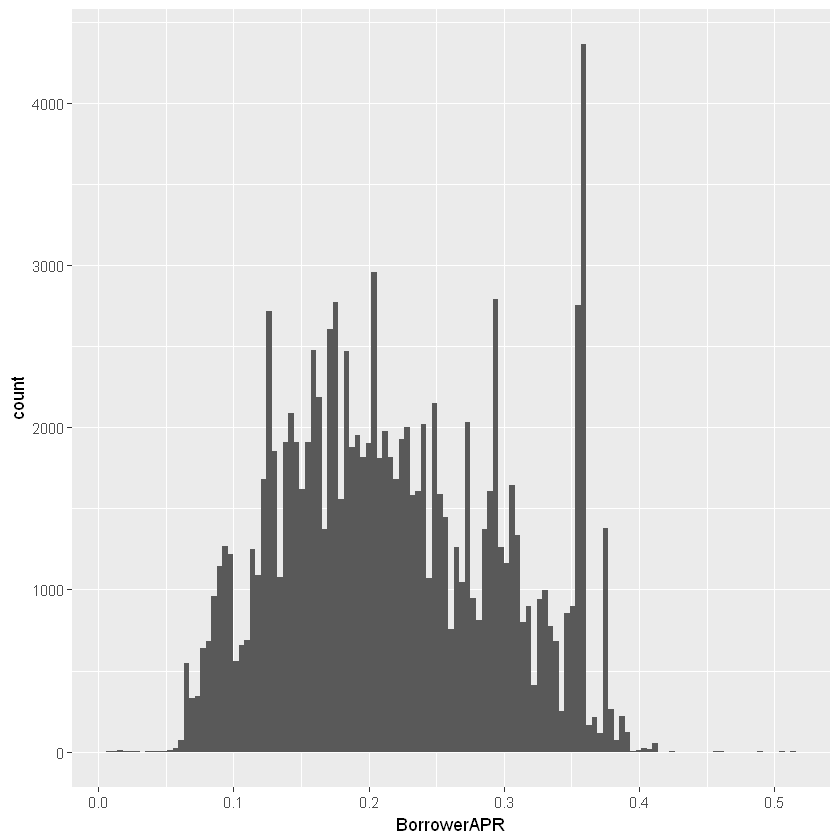

In [17]:
ggplot(loans, aes(BorrowerAPR)) + geom_histogram(bins=125)

Several intersting things there. First off it's almost a normal distribution, but it seems to have  spikes near round APR's, as well as a spike little bit under 30%. There is also a large spike at around 35%. This histogram is a little noisy, so let's look at a density plot.

Warning message:
"Removed 25 rows containing non-finite values (stat_density)."

ERROR: Error in +geom_segment(x = 0.2): invalid argument to unary operator


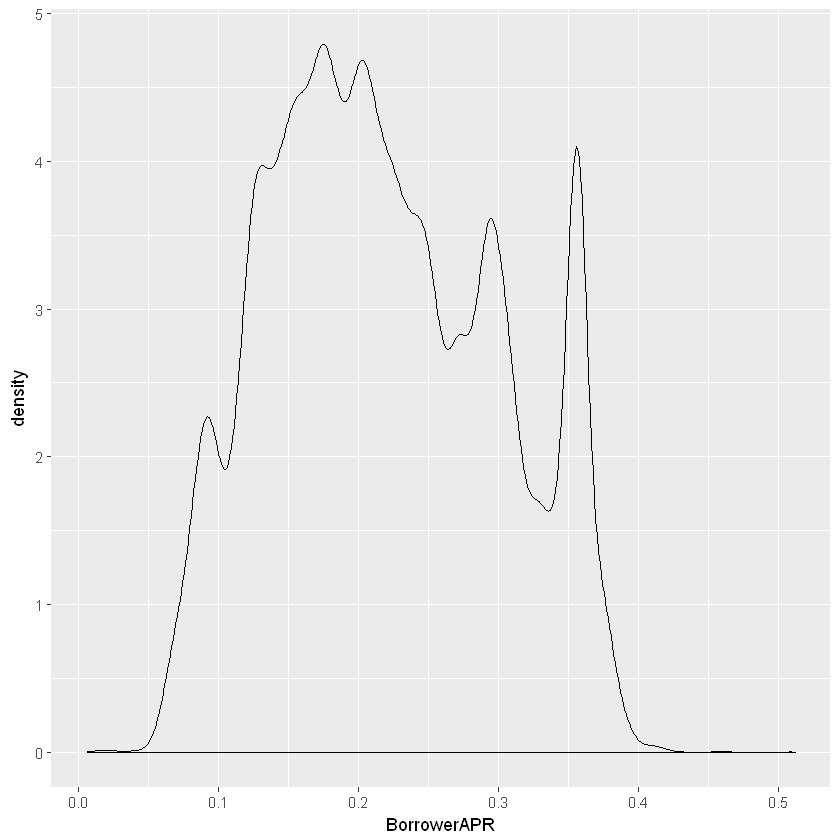

In [18]:
ggplot(loans, aes(BorrowerAPR)) + geom_density()
+ geom_segment(x=.2)

The peaks are easier to see with a density plot. But it is easy to see that a large amount of loans hover around 20% APR.

## BorrowerRate 

In [19]:
summary(loans$BorrowerRate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.1342  0.1840  0.1931  0.2511  0.4975 

Here we notice that the rate is NOT the same thing as the APR. Looking at the definitions document we're simply told that the APR is the Annual Percentage Rate and that the Borrow's Rate is the borrower's interest rate for the loan. Some research tells us that these are calculated by:   

>APR - Annual Percentage Rate. A percentage that represents the acutal yearly cost of funds over the term of the loan. Includes additional costs or fees but does not take compounding into account.  

>Interest Rate - Refers only to the interst charged on the loan, doesn't take other expenses into acount. Therefore, APR tends to be higher than the loan's nominal interst rate. 

>APY or EAR - Annual Percentage Yield or Effective Annual Rate takes compound interest into account. Tends to be larger than APR on the same loan.

As all of the above illustrates, APR can be a misleading indicator of actual costs. Some experts feel the APR is best used to compare long-term loans. Even with shorter-term debt, such as a seven-year note, the APR actually understates the cost of the loan. This is because APR calculations assume long-term repayment schedules; for loans that are repaid faster or have shorter repayment periods, the costs and fees are spread too thin with APR calculations. The average annual impact of closing costs is much smaller when those costs are assumed to have been spread over 30 years instead of seven to 10 years.


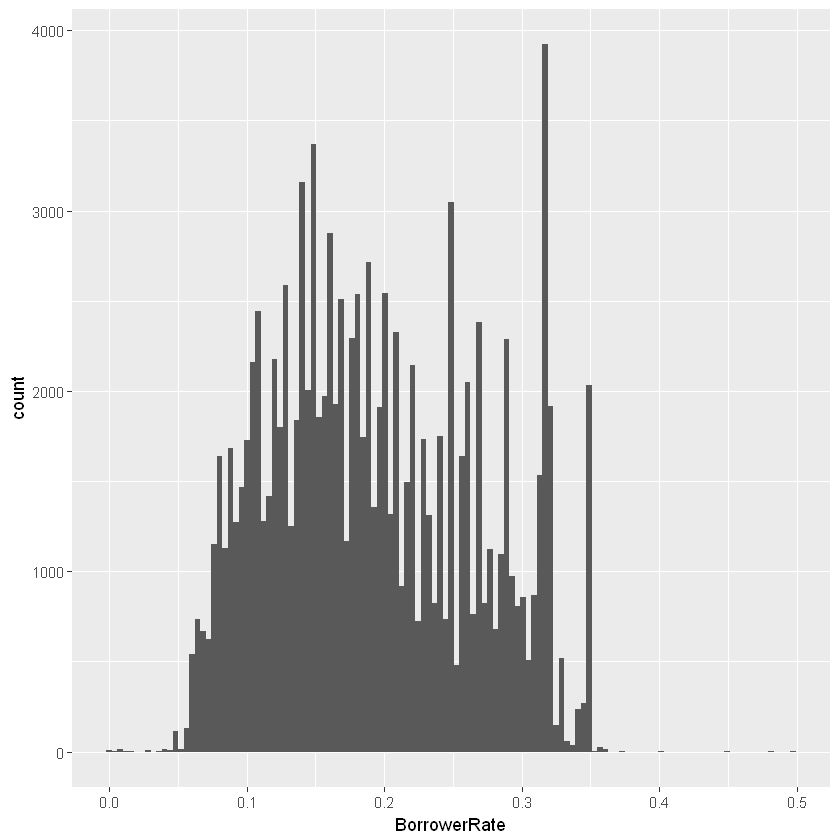

In [21]:
ggplot(loans, aes(BorrowerRate)) + geom_histogram(bins = 125)

## Estimated Effective Yield

In [22]:
summary(loans$EstimatedEffectiveYield)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
 -0.183   0.117   0.162   0.169   0.225   0.320   29084 

Warning message:
"Removed 29084 rows containing non-finite values (stat_bin)."

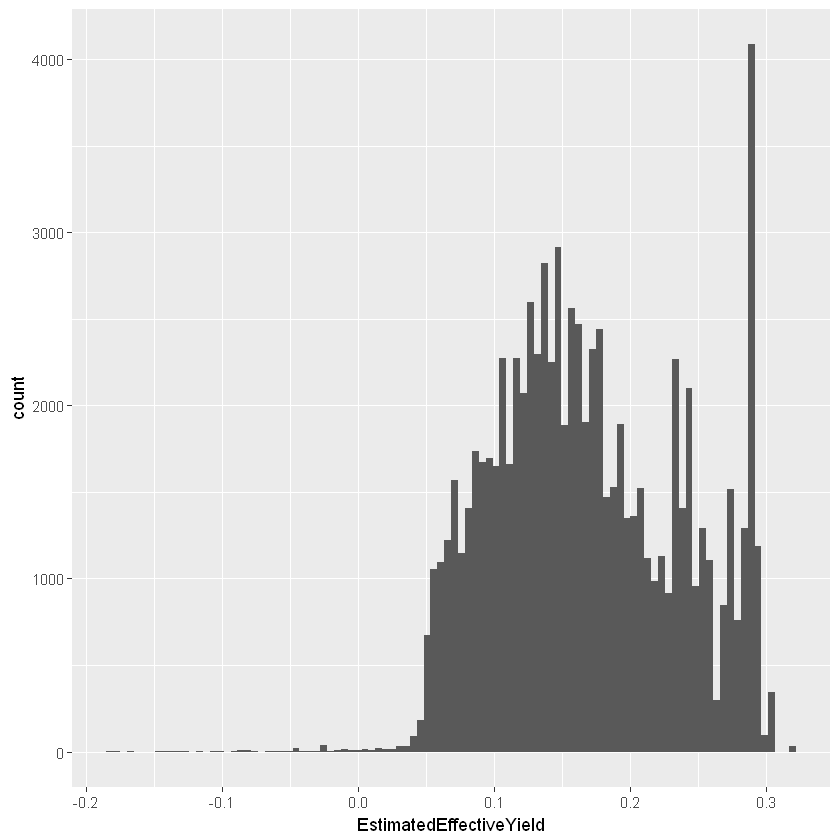

In [23]:
ggplot(loans, aes(EstimatedEffectiveYield)) + geom_histogram(bins=100)
#Why so many rows with non-finite values?

You can see that this distribution mimics the distribution of APR's but moved slightly lower, with some tail to the left as well. Let's see what's causing negative estimated yield loans.

In [27]:
loans %>%
filter(EstimatedEffectiveYield < 0) %>%
summary

#190 loans
#completed 146, chargedoff 42, defaulted, none current, this is not an estimation, nor does this variable really make 
#sense for them
#They didn't have rediculous APR's or anything.
#Could plot against estimated loss to see if there are different things going on here.
#time to close?

                   ListingKey  ListingNumber   
 009B3495741061236C0C927:  1   Min.   :416595  
 02283482060850607BC27FE:  1   1st Qu.:433364  
 02933496318097934A683F4:  1   Median :456488  
 029A3499706893097DB1393:  1   Mean   :456150  
 038535015703591930CD2E0:  1   3rd Qu.:477715  
 03AA34675425410661C8213:  1   Max.   :487169  
 (Other)                :184                   
                    ListingCreationDate  CreditGrade       Term   
 2009-07-14 21:09:50.017000000:  1             :190   Min.   :36  
 2009-07-17 13:57:20.620000000:  1      A      :  0   1st Qu.:36  
 2009-07-23 16:16:18.167000000:  1      AA     :  0   Median :36  
 2009-07-31 15:25:54.323000000:  1      B      :  0   Mean   :36  
 2009-07-31 15:41:11.917000000:  1      C      :  0   3rd Qu.:36  
 2009-08-04 12:24:33.823000000:  1      D      :  0   Max.   :36  
 (Other)                      :184      (Other):  0               
                  LoanStatus                ClosedDate   BorrowerAPR     
 Compl

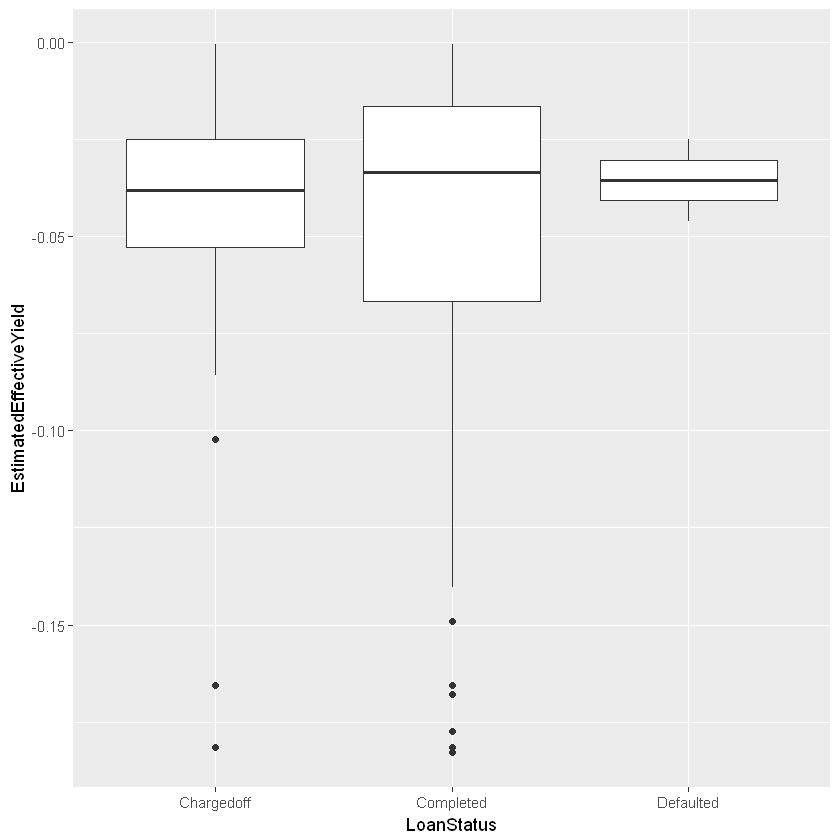

In [29]:
loans %>%
filter(EstimatedEffectiveYield < 0) %>%
ggplot(aes(LoanStatus, EstimatedEffectiveYield, group=LoanStatus)) + geom_boxplot()

Looks like all of the 184 loans that have a negative EstimatedEffectiveYield are not current, but have either been completed, chargedoff, or defaulted. This probably represents either the loss incurred from the loans that where completed ahead of schedule, or had to be taken as a loss. Not really an 'estimate' for any of these statuses because the loss has been realized. 

## ProsperScore

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   4.000   6.000   5.957   8.000  11.000   29084 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 29084 rows containing non-finite values (stat_bin)."

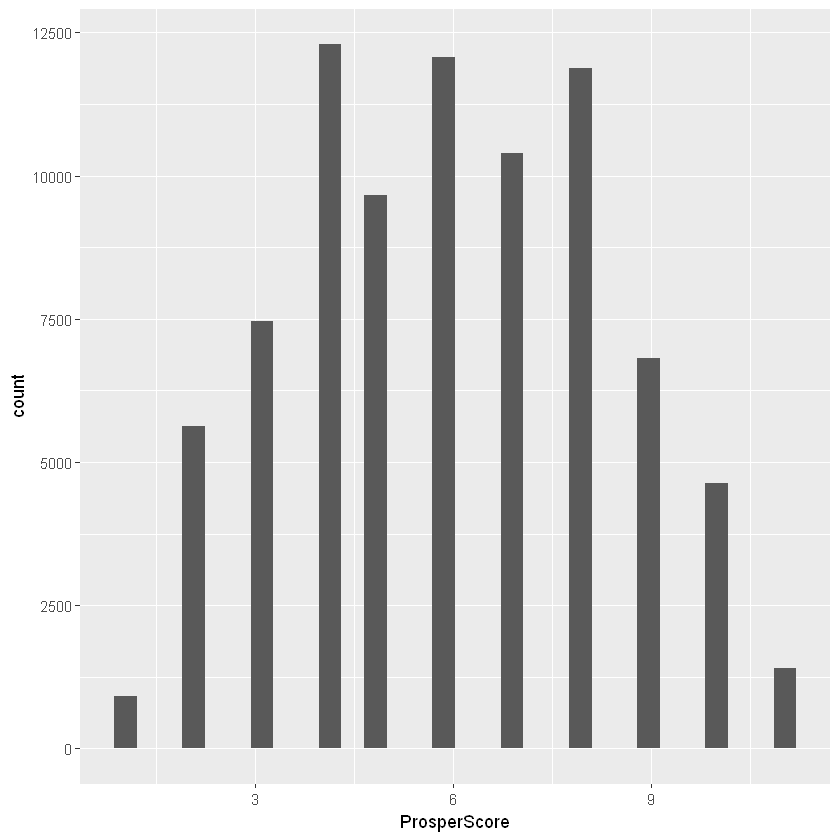

In [30]:
summary(loans$ProsperScore)
ggplot(loans, aes(ProsperScore)) + geom_histogram()

Here you can see that ProsperScore is discrete, and potentially bimodal? Strange clustering between 4 and 5, let's look at unique values.

In [32]:
sort(unique(loans$ProsperScore))

[1]  1  2  3  4  5  6  7  8  9 10 11

1 to 11? That's a strange scale for scoring. Maybe it's analogous to 0 to 10, but they don't want to make people feel bad by giving them 0's.

In [33]:
table(loans$ProsperScore)


    1     2     3     4     5     6     7     8     9    10    11 
  917  5632  7456 12300  9661 12064 10392 11875  6813  4637  1408 

## Listing Category

Wrote a short function to convert the numeric categories to their values.

In [6]:
listingToCharacter <- function(numeric.category){
    listing.categories = c("Not Available", "Debt Consolidation", "Home Improvement", "Business",
                       "Personal Loan", "Student Use", "Auto", "Other", "Baby&Adoption","Boat",
                       "Cosmetic Procedure", "Engagement Ring", "Green Loans", "Household Expenses",
                       "Large Purchases", "Medical/Dental", "Motorcycle", "RV", "Taxes", "Vacation",
                       "Wedding Loans")
    return(listing.categories[numeric.category + 1]) 
}

In [7]:
loans$ListingCategory <- listingToCharacter(loans$ListingCategory..numeric)

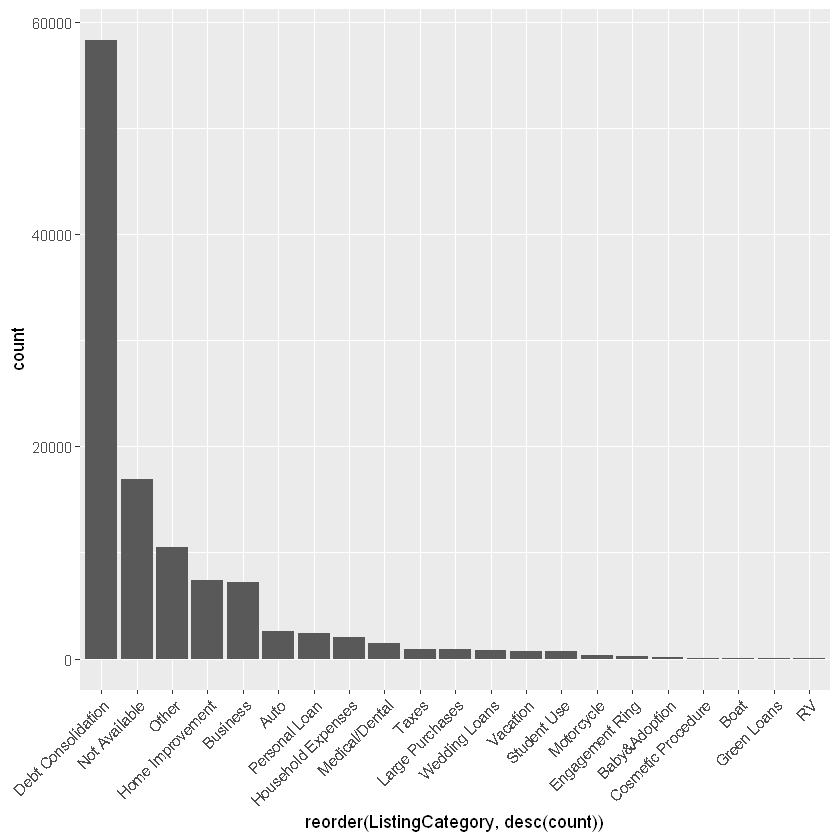

In [8]:
loans %>%
group_by(ListingCategory) %>%
summarise(count = n()) %>%
ggplot(aes(x=reorder(ListingCategory, desc(count)), y=count)) + 
geom_bar(stat="Identity") + 
theme(axis.text.x = element_text(angle = 45, hjust = 1))

It looks like Debt Consolidation is the most popular reason to apply for a loan. 

## Borrower State

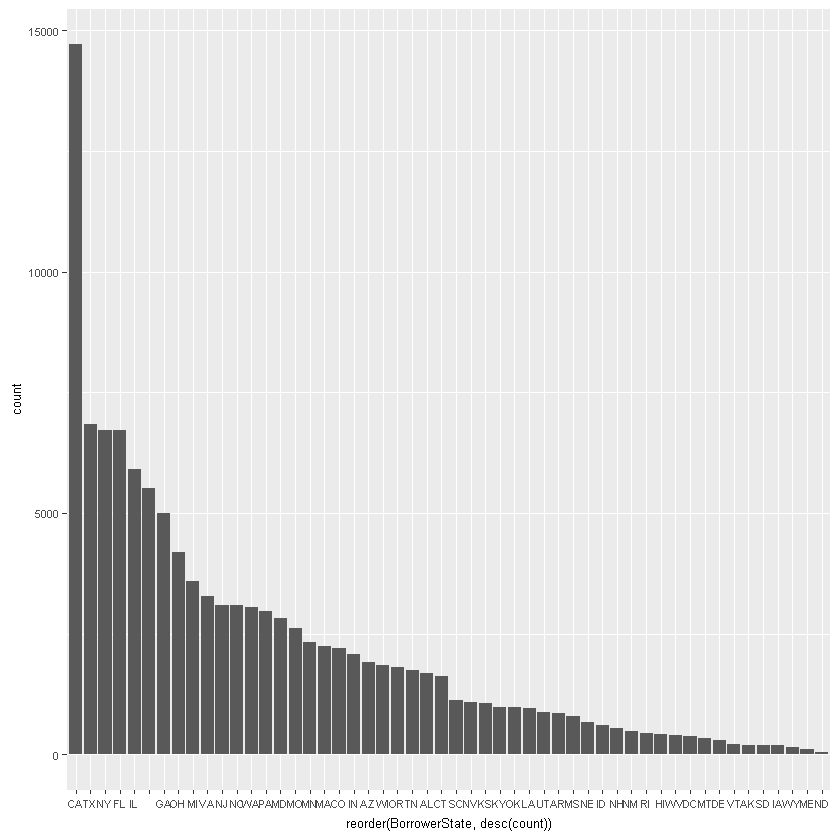

In [9]:
loans %>%
group_by(BorrowerState) %>%
summarise(count = n()) %>%
ggplot(aes(x=reorder(BorrowerState, desc(count)), y=count)) + 
geom_bar(stat="Identity") +
theme(text = element_text(size=8))
#SOMEDAY:choropleth here?

This bar chart doesn't actually tell us much because we would have to weight these by the population of each state to see if there are real differences between them. In fact the first four are ordered exactly as they would be ordered by population.

## Occupation

In [10]:
loans %>% 
group_by(Occupation) %>%
filter(Occupation != "") %>%
summarise(count = n()) %>%
arrange(desc(count)) %>%
filter(count > 3000)

Occupation,count
Other,28617
Professional,13628
Computer Programmer,4478
Executive,4311
Teacher,3759
Administrative Assistant,3688
Analyst,3602
Sales - Commission,3446
Accountant/CPA,3233
Clerical,3164


Again, to see if any occupation actually had an undue number of loans we would have to get an estimate of how many people had each job in the population. Still, categorical variables like this are always interesting to look at since they put a human face on our data. 

## Employment Status

In [11]:
loans %>%
group_by(EmploymentStatus) %>%
summarise(count=n()) %>%
arrange(desc(count))

EmploymentStatus,count
Employed,67322
Full-time,26355
Self-employed,6134
Not available,5347
Other,3806
,2255
Part-time,1088
Not employed,835
Retired,795


Oh, so many questions here.  
Are some of these categories subsets of other categories? (ie Does 'Employed = Full-time+Part-Time+Self Employed"? Let's try to find out.

In [12]:
unique(loans$EmploymentStatus)

[1] Self-employed Employed      Not available Full-time     Other        
[6]               Not employed  Part-time     Retired      
9 Levels:  Employed Full-time Not available Not employed Other ... Self-employed

In [17]:
loans %>% 
filter(EmploymentStatus %in% c('Self-employed','Full-time','Part-time')) %>%
summarise(Self_Full_Or_Part_time = n())

loans %>%
filter(EmploymentStatus == 'Employed') %>%
summarise(Employed = n())

Self_Full_Or_Part_time
33577


Employed
67322


Even with the addition of 'Other' and the NULLs the categories would not approach the number of employment. The way these categories are split up makes this variable less usefull.

## EmploymentStatusDuration

In [18]:
summary(loans$EmploymentStatusDuration)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00   26.00   67.00   96.07  137.00  755.00    7625 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
"Removed 7625 rows containing non-finite values (stat_bin)."

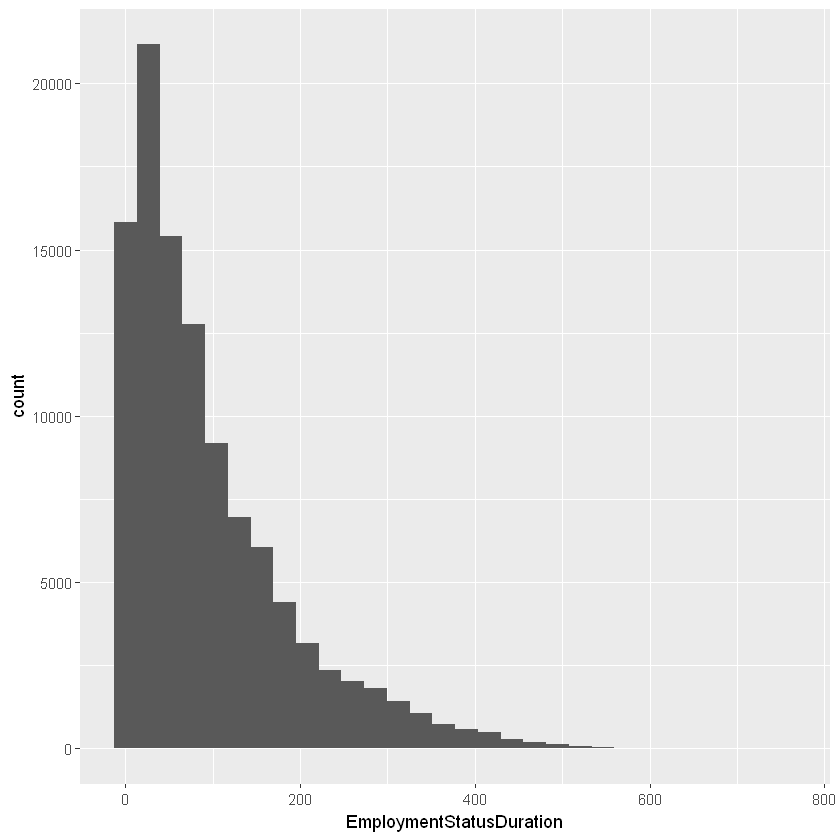

In [19]:
ggplot(loans, aes(EmploymentStatusDuration)) + geom_histogram()

In [20]:
summarise(loans, status.mean = mean(EmploymentStatusDuration, na.rm=TRUE)/12,
         status.median = median(EmploymentStatusDuration, na.rm = TRUE)/12,
         status.min = min(EmploymentStatusDuration, na.rm = TRUE)/12,
         status.max = max(EmploymentStatusDuration, na.rm = TRUE)/12)
#todo

status.mean,status.median,status.min,status.max
8.005965,5.583333,0,62.91667


Looks like someone claims to have worked somewhere for almost 63 years! Maybe they're saying the've been employed for 63 years straight. This distribution is what we would expect to see, with the exception of the responders who sayed thier duration was 0 months.

## Credit Score

Credit Range Upper and Lower. I would like to know the interval within score for each person.

In [23]:
head(loans$CreditScoreRangeUpper)

[1] 659 699 499 819 699 759

In [6]:
summary(loans$CreditScoreRangeUpper)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   19.0   679.0   699.0   704.6   739.0   899.0     591 

Interesting that there are Credit Scores under 300, which I know is the lowest CreditScore you can have.

In [4]:
loans %>%
select(CreditScoreRangeLower, CreditScoreRangeUpper) %>%
mutate(interval =  CreditScoreRangeUpper - CreditScoreRangeLower) %>%
summarise(int_mean = mean(interval, na.rm=TRUE),
         int_median = median(interval, na.rm=TRUE),
         int_max = max(interval, na.rm=TRUE),
         int_min = min(interval, na.rm=TRUE))

int_mean,int_median,int_max,int_min
19,19,19,19


Surprisingly it is the same for every person, which saves me the trouble of constructing a variable to represent their mean.

Warning message:
"Removed 591 rows containing non-finite values (stat_bin)."

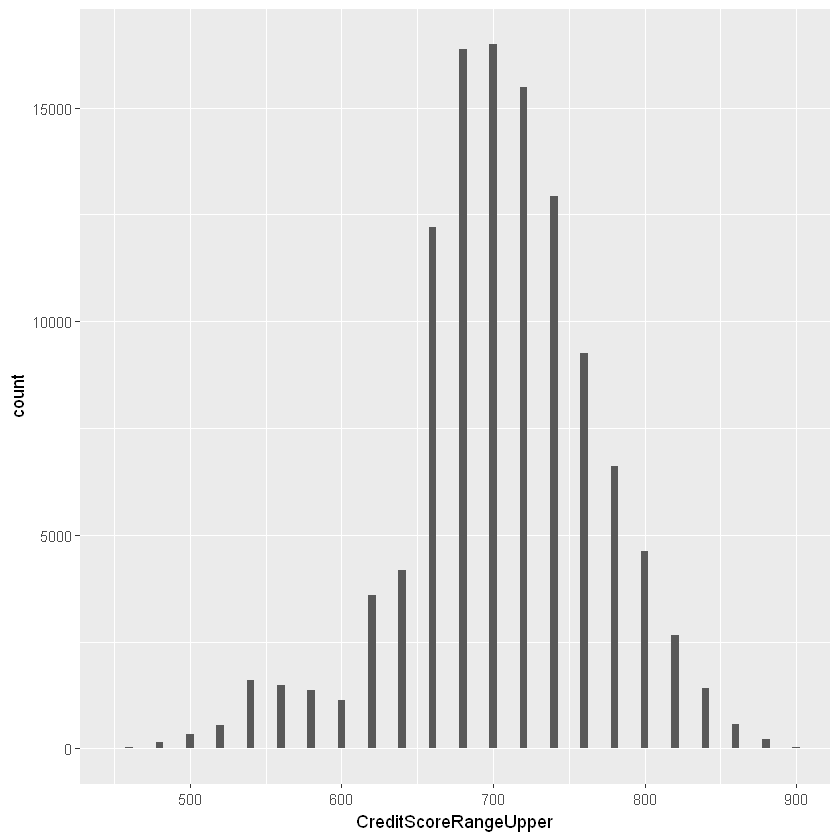

In [5]:
ggplot(loans, aes(CreditScoreRangeUpper)) + 
geom_histogram(binwidth=5) + 
coord_cartesian(xlim=c(450,900))
#Zooming in to take because Credit Score of 0 ruins scale of histogram.

The two bumps in credit score here remind me of the bumps in APR/Rate. I'm sure there is a correlation there - more people with the same credit score more people with the same rate. I wonder how Prosper comes up with their score, is it just Fico or something more? Also it would be interesting to see what credit score distribution looks like in the general population.

## Lender Yield

In [7]:
#Lender Yield
summary(loans$LenderYield)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.0100  0.1242  0.1730  0.1827  0.2400  0.4925 

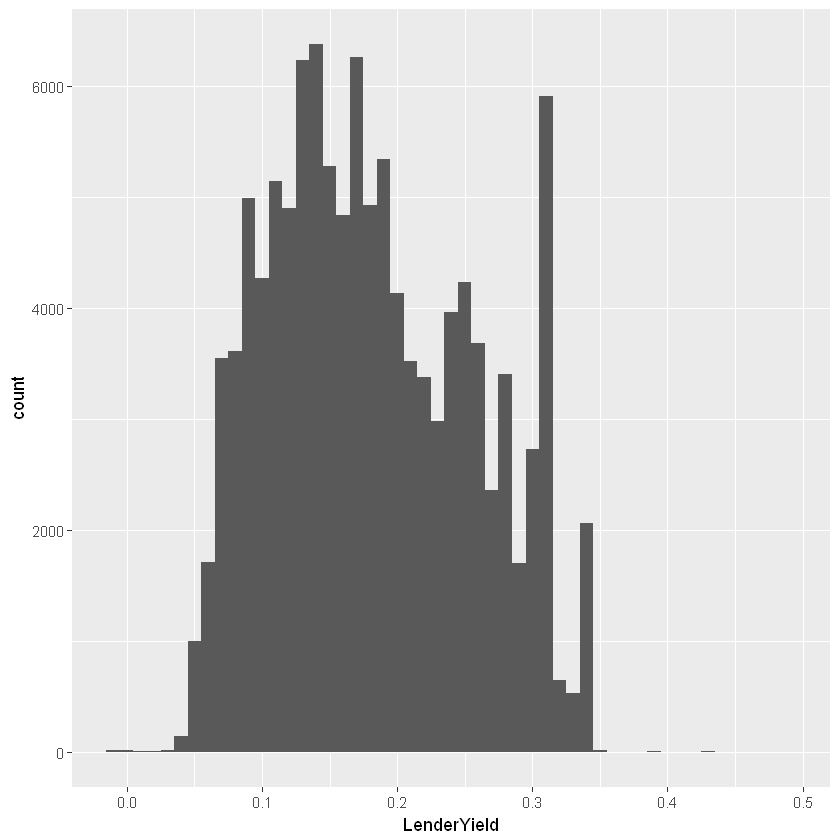

In [8]:
ggplot(loans, aes(LenderYield)) + geom_histogram(binwidth = .01)

The same spike that exists in the other Rate plots exists her at around 30%. Hard to know if this is a pricing strategy, or a rate that is popular for other reasons. It is roughly equivalent to a credit card. The max is slightly under the max borrower rate, so fees paid to Prosper must not be included in this number.

## Income Range

In [10]:
loans$IncomeRange <- factor(loans$IncomeRange, levels = c('$0', '$1-24,999', '$25,000-49,999', 
                                                            '$50,000-74,999', '$75,000-99,999',  
                                                            '$100,000+', 'Not displayed', 'Not employed'))

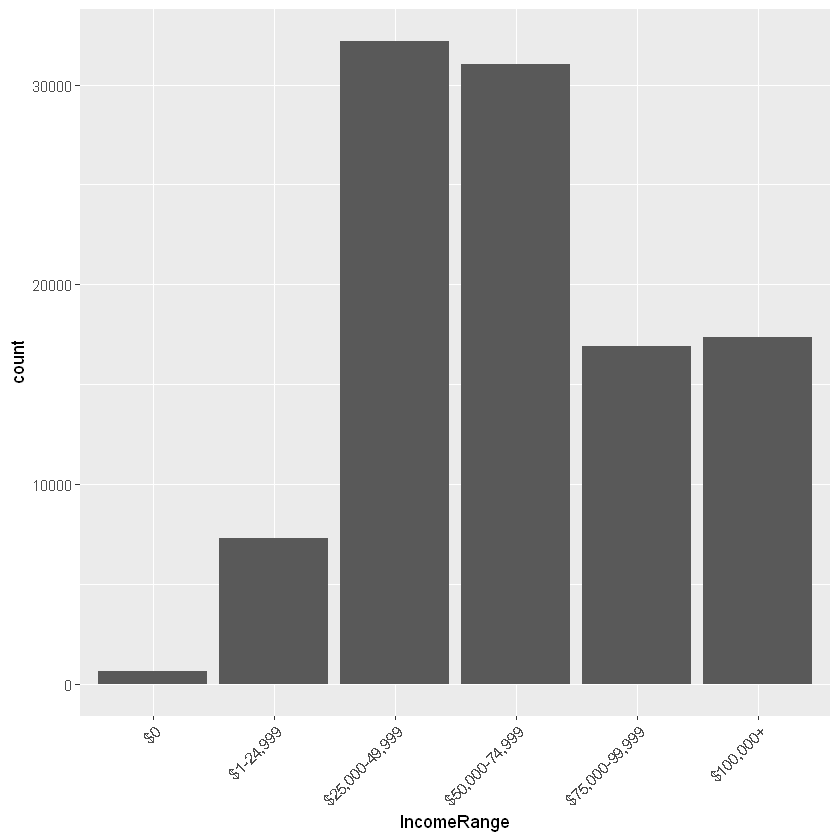

In [11]:
loans %>%
filter(!IncomeRange %in% c('Not displayed', 'Not employed')) %>%
ggplot(aes(IncomeRange)) + geom_bar() +
theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [ ]:
#Todo: investigate loans made to people with $0 income.

## Income Verifiable

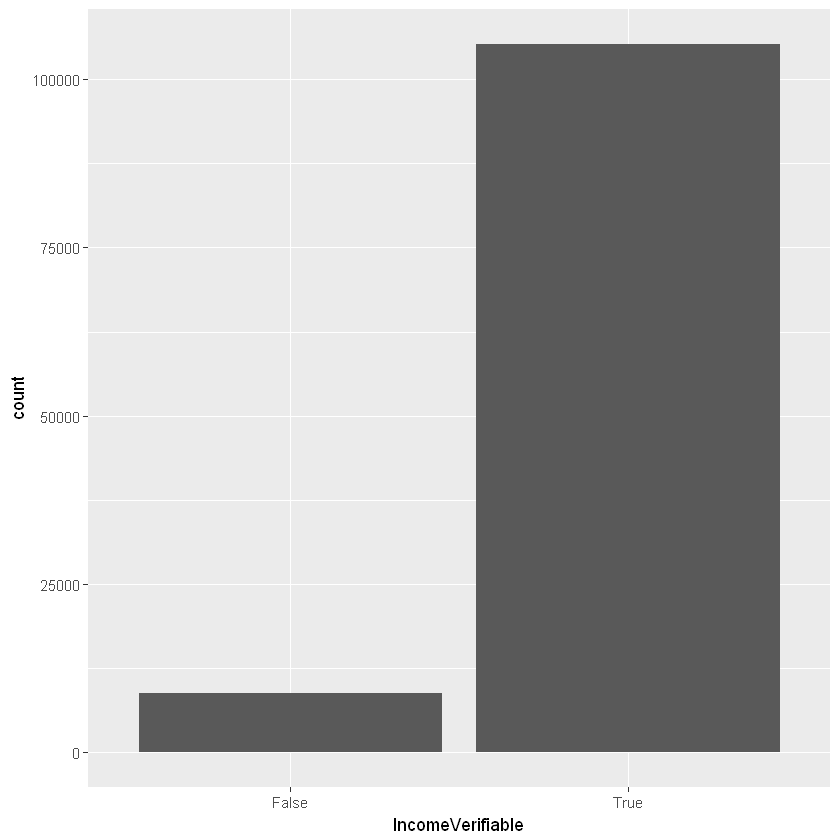

In [11]:
ggplot(loans, aes(IncomeVerifiable)) + geom_bar()

Looks like most loans go to people with verifiable incomes. Todo:
Wonder what the non-verified loans look like, and what the distribution of IncomeRanges changes to. 

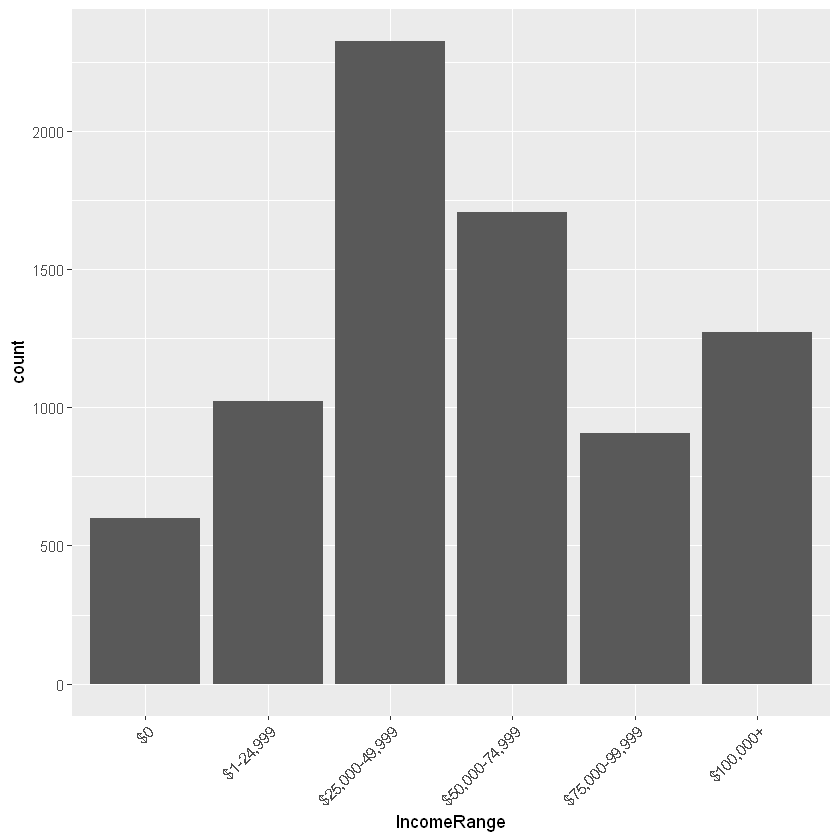

In [12]:
loans %>% 
filter(IncomeVerifiable == 'False') %>% 
filter(!IncomeRange %in% c('Not displayed', 'Not employed')) %>%
ggplot(aes(IncomeRange)) + geom_bar() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

The distribution of IncomeRanges for non-verified incomes is slightly different from the verified incomes. Seems like $100k+ gets a bump upwards in particular.

## Monthly Loan Payment

In [13]:
summary(loans$MonthlyLoanPayment)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   131.6   217.7   272.5   371.6  2252.0 

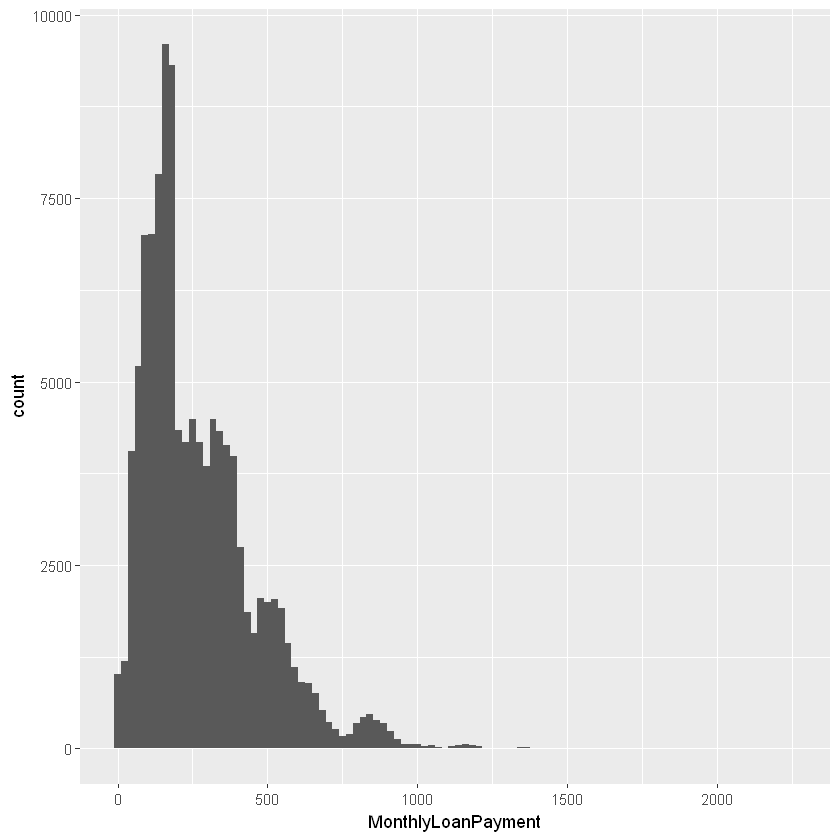

In [16]:
monthly_payment <- ggplot(loans, aes(MonthlyLoanPayment)) + geom_histogram(bins=100)
monthly_payment

Looks like there's a big outlier there with our max  22252. But our histogram makes it hard to see this. Let's zoom in on the bulk of the payments.

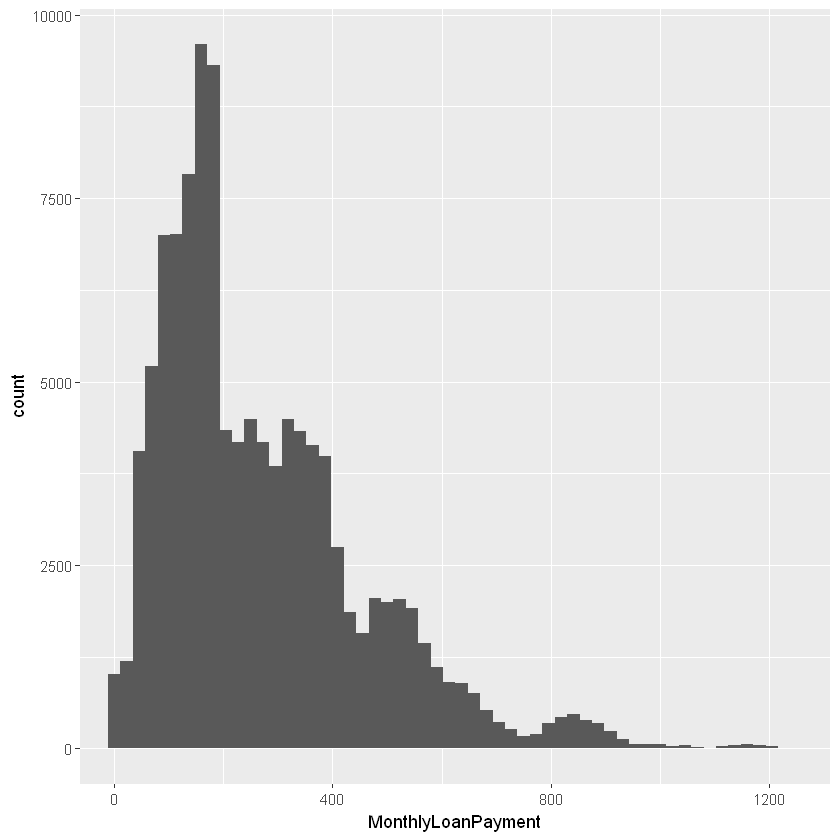

In [17]:
monthly_payment + coord_cartesian(c(0,1250))

After 200 there is a sharp drop off in monthly payments. Perhaps there is some sort of sales tactic there, or a correlation with a common loan amount.

## Loan Original Amount

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1000    4000    6500    8337   12000   35000 

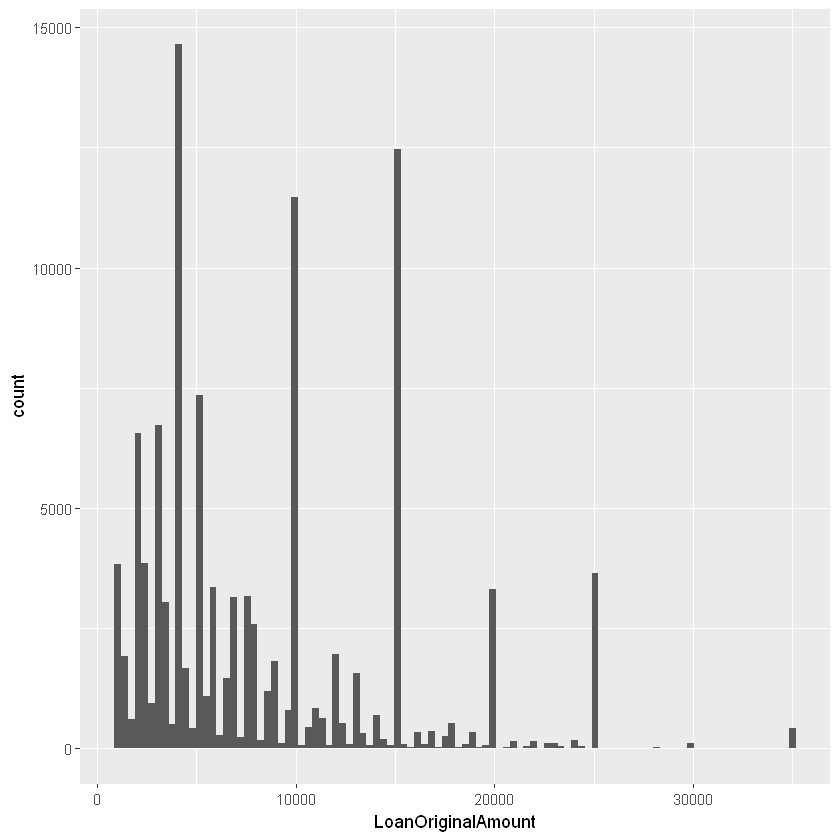

In [18]:
summary(loans$LoanOriginalAmount)
ggplot(loans, aes(LoanOriginalAmount)) + geom_histogram(bins=100)

We can see that Loan Amounts tend to be in whole numbers. Let's see the most common loan amounts.

In [19]:
loans %>%
group_by(LoanOriginalAmount) %>%
summarise(count = n()) %>%
filter(count > 3000) %>%
arrange(desc(count))

LoanOriginalAmount,count
4000,14333
15000,12407
10000,11106
5000,6990
2000,6067
3000,5749
25000,3630
20000,3291
1000,3206


In [1]:
loans %>%
ggplot(aes(LoanOriginalAmount)) + geom_density()

ERROR: Error in eval(expr, envir, enclos): could not find function "%>%"


## Percent Funded

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7000  1.0000  1.0000  0.9986  1.0000  1.0120 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


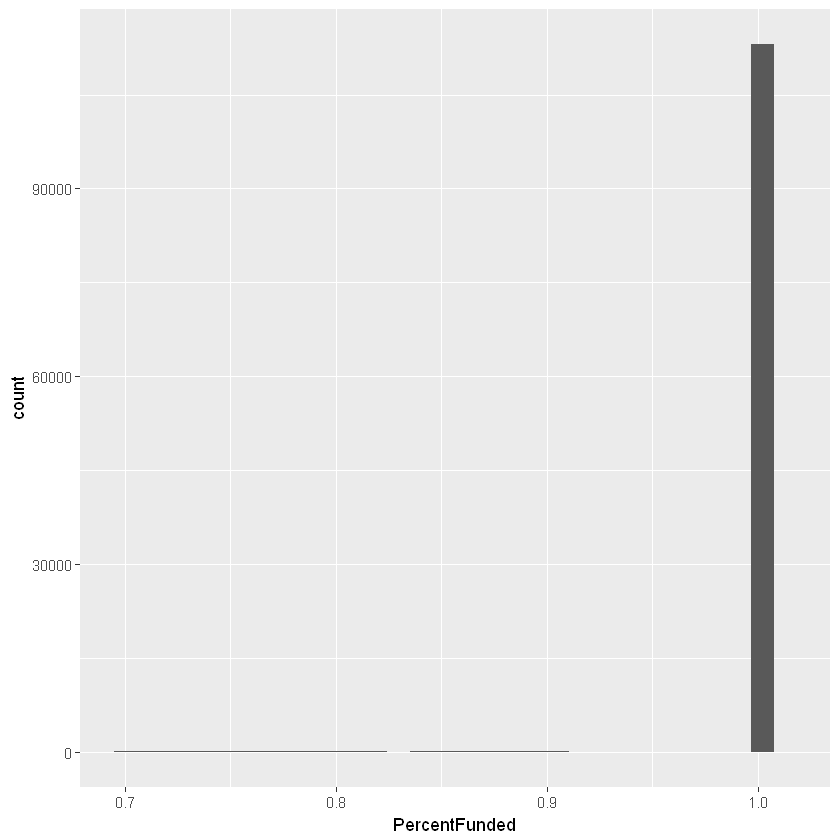

In [20]:
summary(loans$PercentFunded)
ggplot(loans, aes(PercentFunded)) + geom_histogram()

OK, so it looks like the vast percentage were 100% funded (or they probably wouldn't be in this dataset!) Let's take a closer look at those that weren't.  
Also, it looks like minimally 70% of the loans in the set were funded. Maybe that is Prosper's cutoff?

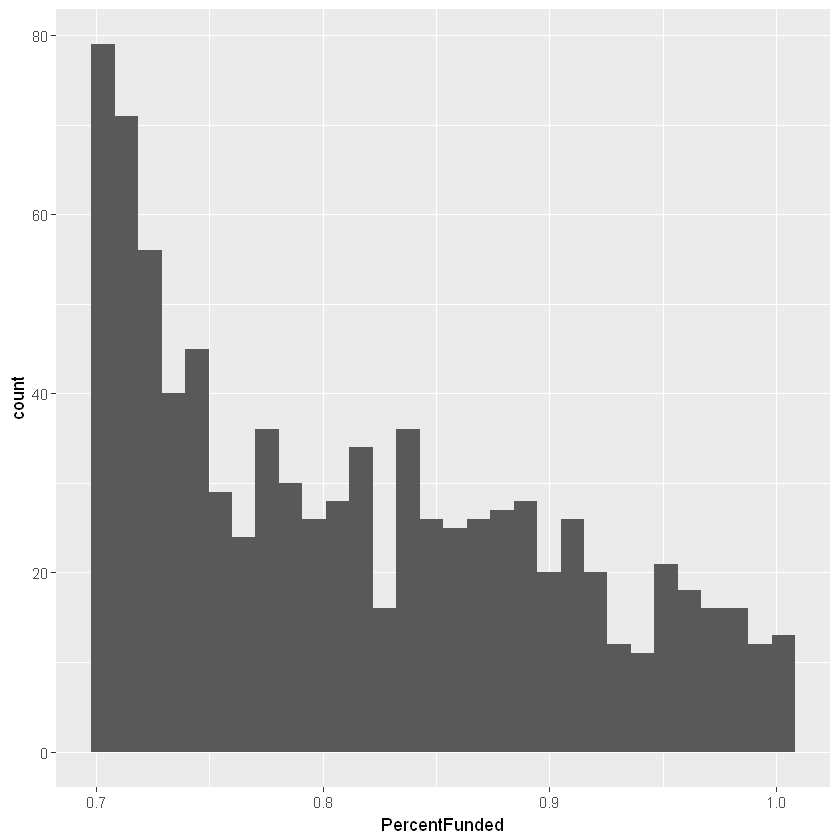

In [21]:
loans %>%
filter(PercentFunded < 1) %>%
ggplot(aes(PercentFunded)) + geom_histogram(bins=30)

The only thing I see for sure here is that of the loans that do not get 100% funded, many are 70% funded, and the amount at each precentage from 70-99% trends downward until it hits 100%, where most of the loans reside. Tis could be interprested as the higher your funding percentage the more likely you are to be funded 100%.

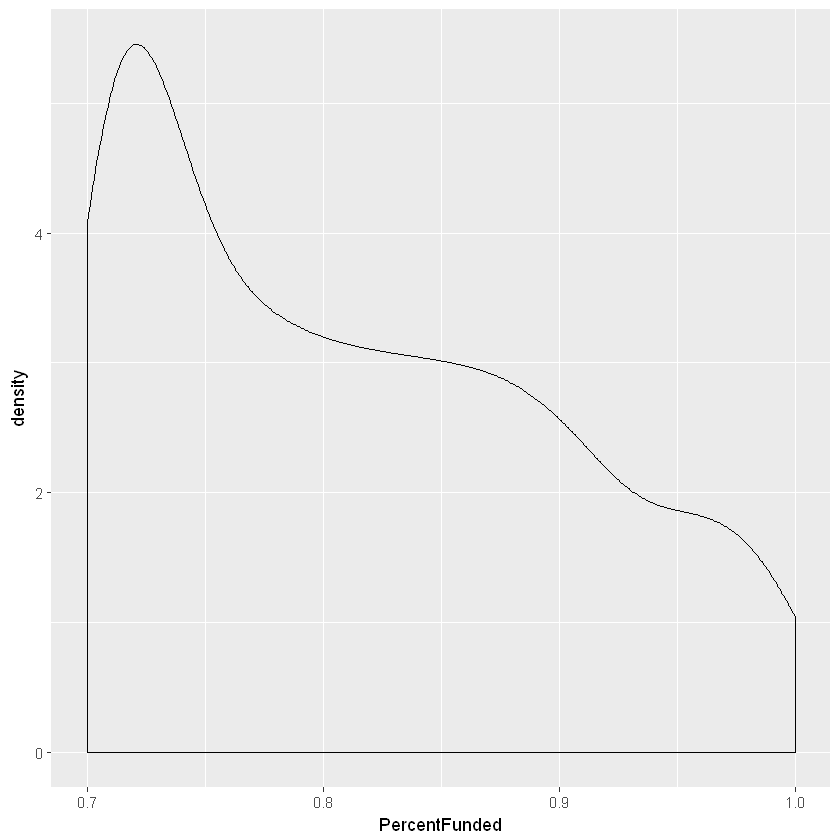

In [22]:
loans %>%
filter(PercentFunded < 1) %>%
ggplot(aes(PercentFunded)) + geom_density()

## Number of Investors

In [23]:
summary(loans$Investors)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    2.00   44.00   80.48  115.00 1189.00 

Should be related to the size of the loan.

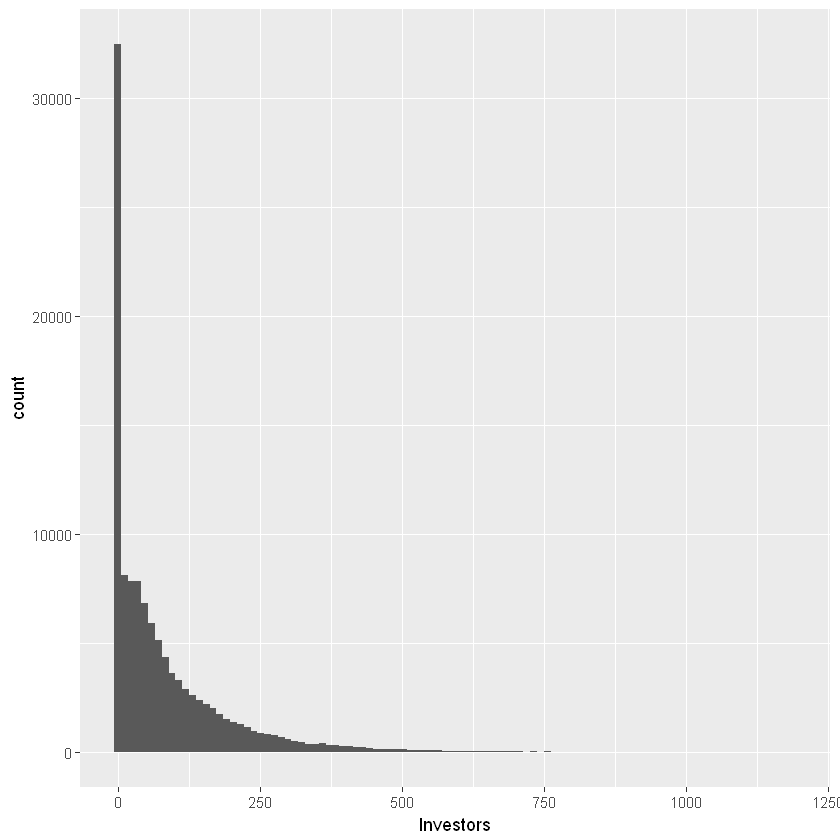

In [24]:
ggplot(loans, aes(Investors)) + geom_histogram(bins=100)

Wow, in a a platform that lets you pool your risk with other investors, a vast majority of loans still only have 1 investor.

In [25]:
loans %>%
group_by(Investors) %>%
summarise(count = n()) %>%
filter(Investors <= 5)

Investors,count
1,27814
2,1386
3,991
4,827
5,753


# Multivariate Exploration

## Term and APR

1 - Term 
#####LoanStatus = Need tto group loans efffectively first
#####Income Range
#####Loan Amount

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."

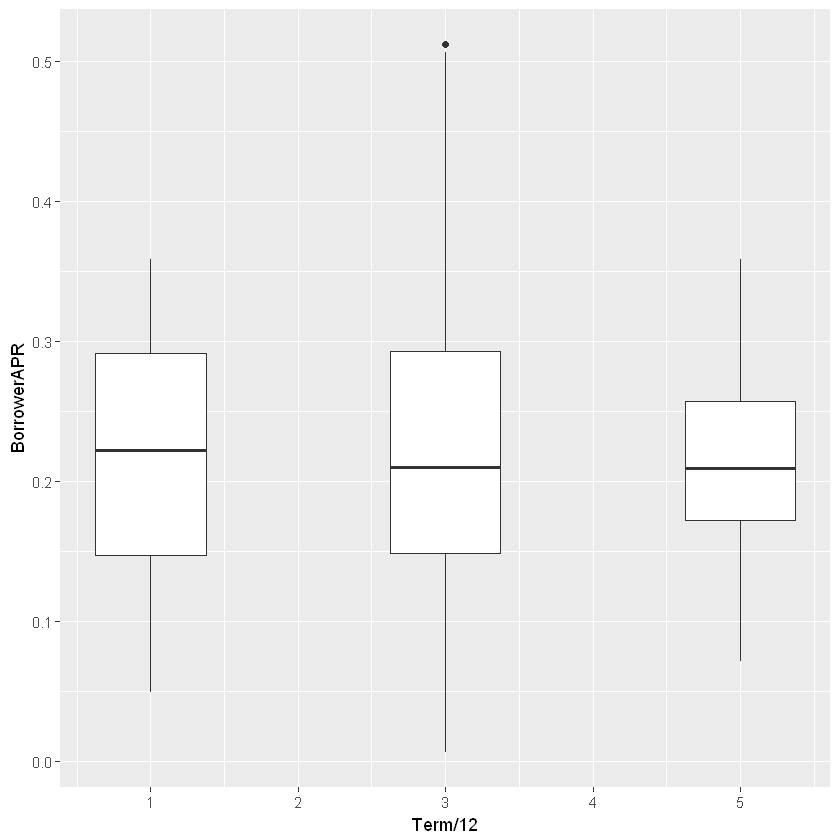

In [26]:
ggplot(loans, aes(group=Term, x=Term/12, y=BorrowerAPR)) + geom_boxplot()

It seems that the median APR stays about the same over all three terms, though the longest term loans fall in a tighter, lower range.

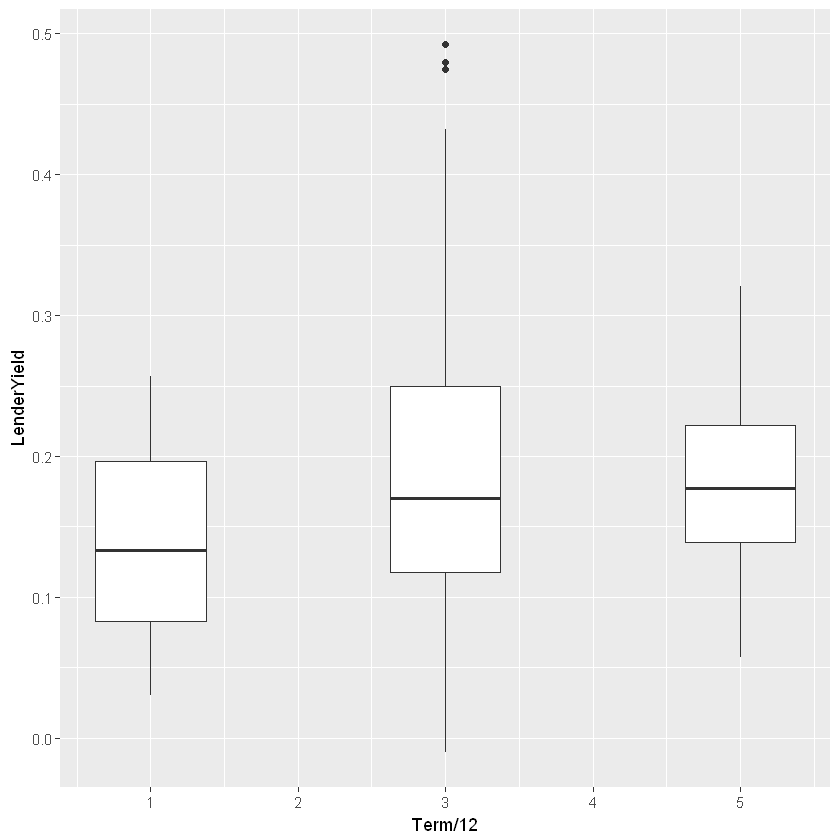

In [27]:
ggplot(loans, aes(group=Term, x=Term/12, y=LenderYield)) + geom_boxplot()

Well that's interesting, but in hindsight pretty obvious. Though the median Borrower APR stays flat over the three terms, the expect yield increases. That makes sense though, seeing that given 2 loans of the same amount with the same APR the one with the longer term will have a higgher yield. (More payments, more time to collect interest, etc.

Warning message:
"Removed 29084 rows containing non-finite values (stat_boxplot)."

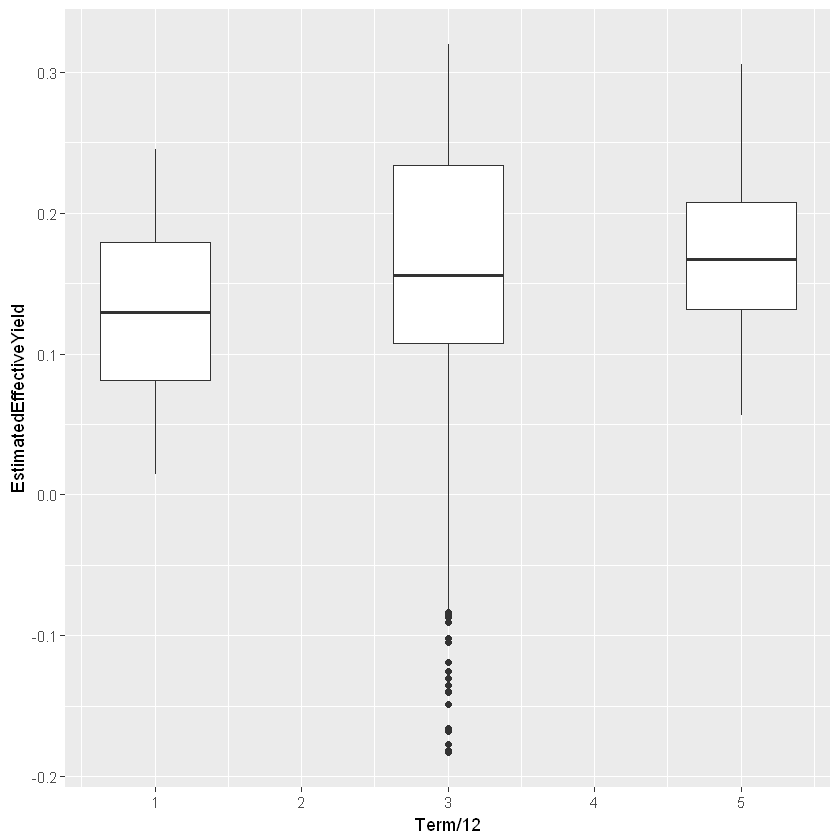

In [28]:
#Let's look at the same thing for Estimated Effective Yield
ggplot(loans, aes(group=Term, x=Term/12, y=EstimatedEffectiveYield)) + geom_boxplot()

The term's relationship to one another stay static, but there are a bunch of outliers with negative Estimated Effective Yield, and only in the 3 year term. Let's take a look atht those loans.

In [ ]:
dim(loans)
with_income_info <- loans %>%
filter(!IncomeRange %in% c('Not displayed','Not employed'))
dim(with_income_info)

In [ ]:
#makes sense to use percentage here, or comparing apples to oranges.
#So that is Count of Income Using that Term / Count of People with that Income
income_facet <- ggplot(with_income_info, aes(Income Range)) + geom_bar()

In [ ]:
ggplot(with_income_info, aes(Term, fill=IncomeRange)) + geom_bar(position="dodge") 

In [ ]:
#plotting term count grouped by incomerange, income range with term 
p <- with_income_info %>% group_by(IncomeRange) %>% count(Term) %>% arrange(IncomeRange, Term)
ggplot(p, aes(Term))+geom_bar()
#this deffinitely creates the right table - need to figure out how to plot it
#might have to add 12 mo term to 0
#OK - so doesn't like trying to plot 'objects of type grouped'. can i ungroup them or r
#coerce them into being something else/

In [ ]:
ggplot(with_income_info, aes(Term)) + geom_bar() + facet_wrap(~IncomeRange)

#these graphs are still deficient because they're absolute, not perncentage /density

In [ ]:
#for each income bucket, what percentage of loans are which term
loans %>%
filter(IncomeRange )
group_by(IncomeRange, Term) %>%
summarise(number_of_loans = n()) %>%
mutate(freq = number_of_loans / sum(number_of_loans)) 


In [ ]:
#for each income bucket, what percentage of loans are whic term
loans %>%
select(ListingKey, Term, IncomeRange) %>%
group_by(IncomeRange) %>%
mutate(number_of_loans = n()) %>%
group_by(Term) %>%
summarize(percentage_term = n())